In [1]:
import statsmodels.api as sm
import numpy as np

In [4]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

### Data 

In [2]:
x1 = [242/365,4,5,6,7,8]
x2 = [242/365,4,5,6,7,8,9,10,11,12,13,14,15,16]
y = [1,6.968707,38.182149,54.162443,163.811997,333.852928]

In [3]:
x = np.array([x1])
y = np.array(y)

In [5]:
def func(x, a, b):
    return a * np.exp(-b * x) 

In [6]:
curve_fit(f=func,xdata=x1,ydata=y)
popt, pcov = curve_fit(func, x1, y)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


In [7]:
popt

array([ 0.59009326, -0.79324106])

### Costs of Projects:

### Solving for: ∫ 0.590*e^(0.793*x) = 17,700 gives x = 12.751
### Solving for: ∫ 0.590*e^(0.793*x) = 86,200 gives x = 14.755
### Solving for: ∫ 0.590*e^(0.793*x) = 10,000 gives x = 12.028

In [90]:
mx,my = [12.8,12.801],[0,14000]
ax,ay = [14.8,14.801],[0,68100]
hx,hy = [12.1,12.101],[0,7900]

In [91]:
x2 = np.array(x2)

In [92]:
alphay = [8505,9737,10737,12733,14136,15826,19478,12662,30736]
alphaConvRate = [1.5,1.5,1.5,1.5,1.5,1.5,1.5,1.4,1.3]
alphax = [0,1,2,3,4,5,6,7,8]
alphax = np.array(alphax)
alphay = np.array(alphay)

In [93]:
for i in range(len(alphay)):
    alphay[i] = alphay[i]/alphaConvRate[i]

In [94]:
curve_fit(f=func,xdata=x1,ydata=y)
popt2, pcov = curve_fit(func, alphax, alphay)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app


/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:1479: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ret = ax.set_ylim(*args, **kwargs)


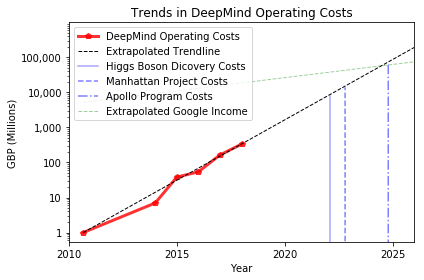

In [95]:
plt.figure()
plt.plot(x1, y, 'pr-', label='DeepMind Operating Costs', linewidth=3.0, alpha=.8)
plt.plot(x2, func(x2, *popt), 'k--', label="Extrapolated Trendline", linewidth=1.0)
plt.plot(hx, hy, 'b-', label='Higgs Boson Dicovery Costs',alpha=0.35)
plt.plot(mx, my, 'b--', label='Manhattan Project Costs',alpha=0.5)
plt.plot(ax, ay, 'b-.', label='Apollo Program Costs',alpha=0.5)
plt.plot(x2, func(x2, *popt2), 'g--', label='Extrapolated Google Income',linewidth=1.0, alpha=0.375)
plt.yscale('log')
plt.xlim(0,16)
plt.xticks([0,5,10,15],['2010','2015','2020','2025'])
plt.yticks([1,10,100,1000,10000,100000],['1','10','100','1,000','10,000','100,000'])
plt.ylabel('GBP (Millions)')#£
plt.xlabel('Year')
plt.title('Trends in DeepMind Operating Costs')
plt.ylim(0,1000000)
plt.legend(loc=2)
plt.tight_layout()
plt.savefig('DeepMindOperatingCosts',dpi=600)
plt.show()